In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"D:\py\DeepLearningML\8_sgd_vs_gd\homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [3]:
df.sample(5)

,area,bedrooms,price
8,1310,3,50.0
16,1180,3,48.0
10,1800,3,82.0
9,3700,5,167.0
13,1100,2,40.0


In [4]:
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()
scaled_X=sx.fit_transform(df.drop('price',axis='columns'))



In [5]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))


In [8]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [13]:
w=np.ones(shape=2)
w

array([1., 1.])

In [11]:
scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [14]:
np.dot(w,scaled_X.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [17]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    number_of_feature=X.shape[1]
    w=np.ones(shape=(number_of_feature))
    b=0
    total_samples=X.shape[0]
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        y_predicted=np.dot(w,scaled_X.T)+b#w1*are+w2*bedroom
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w,b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [18]:
###### Now plot epoch vs cost graph to see how cost reduces as number of epoch increases

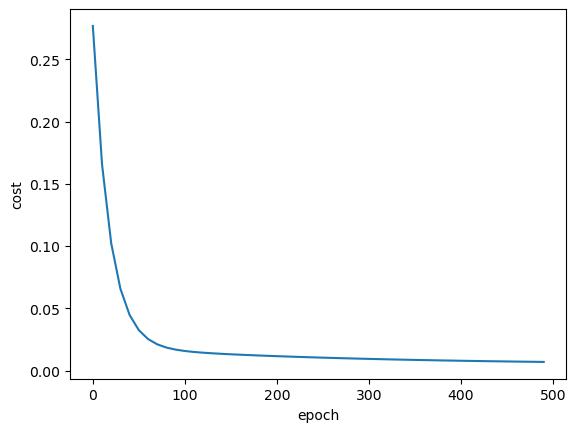

In [20]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [23]:
sy.inverse_transform([[1,0]])#min max value from excel

array([[167.,  32.]])

In [24]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]#[0][0]not give ans in 2d[[128.45]]

predict(2600,4,w,b)

C:\Users\sriva\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [25]:
predict(1500,3,w,b)

C:\Users\sriva\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

In [26]:
#stochastic_gradient_desent
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

3

In [28]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70602158, 0.67551382]), -0.2306911380110156, 0.0023123435551208552)

In [29]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

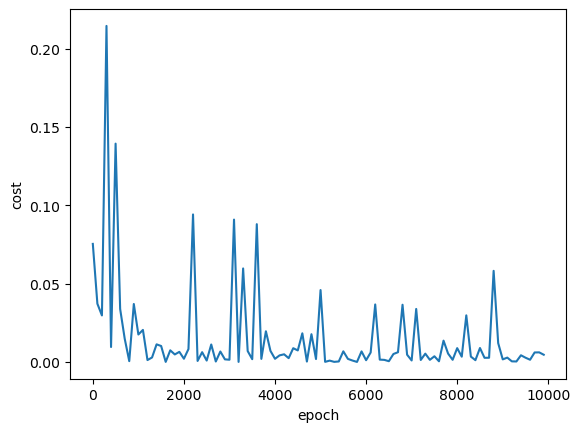

In [30]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [31]:
predict(2600,4,w_sgd, b_sgd) 

C:\Users\sriva\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.4122102082682

In [32]:
predict(1500,3,w_sgd, b_sgd)

C:\Users\sriva\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.46044463450563